In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('taxi_fare.csv')

In [4]:
data.head(7)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-74.017197,40.705383,1,N,-73.978073,40.755787,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,6,-73.994583,40.727848,1,N,0.000000,0.000000,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30


# **Understand the data**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [10]:
data.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [12]:
# Check for nulls
data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

# **Handling Duplicates**

In [15]:
data.duplicated().sum()

0

# **Feature Engineering**

In [18]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [20]:
from datetime import datetime
import pytz
# Convert pickup_datetime to datetime format and set timezone to UTC
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].dt.tz_localize('UTC')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['tpep_dropoff_datetime'] = data['tpep_dropoff_datetime'].dt.tz_localize('UTC')

# Convert pickup_datetime from UTC to EDT (UTC-4)
edt = pytz.timezone('US/Eastern')
data['tpep_pickup_datetime_edt'] = data['tpep_pickup_datetime'].dt.tz_convert(edt)
data['tpep_dropoff_datetime_edt'] = data['tpep_dropoff_datetime'].dt.tz_convert(edt)

# Extract day of the week and time of day
data['pickup_day'] = data['tpep_pickup_datetime_edt'].dt.day_name()
data['am_pm'] = np.where(data['tpep_pickup_datetime_edt'].dt.hour < 12, 'am', 'pm')

# Create a binary flag for late-night/early-morning trips (assuming late-night/early-morning is between 12am and 6am)
data['is_night'] = np.where((data['tpep_pickup_datetime_edt'].dt.hour >= 0) & (data['tpep_pickup_datetime_edt'].dt.hour < 6), 1, 0)

# Calculate trip distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the earth in km
    dlat = np.deg2rad(lat2 - lat1)
    dlon = np.deg2rad(lon2 - lon1)
    a = np.sin(dlat/2)**2 + np.cos(np.deg2rad(lat1))*np.cos(np.deg2rad(lat2))*np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c  # Distance in km
    return d

data['trip_distance'] = haversine(data['pickup_latitude'], data['pickup_longitude'], data['dropoff_latitude'], data['dropoff_longitude'])


In [21]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'tpep_pickup_datetime_edt', 'tpep_dropoff_datetime_edt', 'pickup_day',
       'am_pm', 'is_night', 'trip_distance'],
      dtype='object')

In [24]:
data['pickup_month_edt'] = data['tpep_pickup_datetime_edt'].dt.month
data['pickup_date_edt'] = data['tpep_pickup_datetime_edt'].dt.day
data['pickup_year_edt'] = data['tpep_pickup_datetime_edt'].dt.year
data['dropoff_month_edt'] = data['tpep_dropoff_datetime_edt'].dt.month
data['dropoff_date_edt'] = data['tpep_dropoff_datetime_edt'].dt.day
data['dropoff_year_edt'] = data['tpep_dropoff_datetime_edt'].dt.year

In [26]:
data['hour'] = data['tpep_pickup_datetime'].dt.hour
data['fare_amount'] = data['fare_amount']
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds()/60
data['fare_per_mile'] = data['fare_amount'] / data['trip_distance']
data['fare_per_minute'] = data['fare_amount'] / data['trip_duration']

In [28]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'tpep_pickup_datetime_edt', 'tpep_dropoff_datetime_edt', 'pickup_day',
       'am_pm', 'is_night', 'trip_distance', 'pickup_month_edt',
       'pickup_date_edt', 'pickup_year_edt', 'dropoff_month_edt',
       'dropoff_date_edt', 'dropoff_year_edt', 'hour', 'pickup_hour',
       'trip_duration', 'fare_per_mile', 'fare_per_minute'],
      dtype='object')

# **Exploratory Data Analysis (EDA)**

In [31]:
data.shape

(212345, 35)

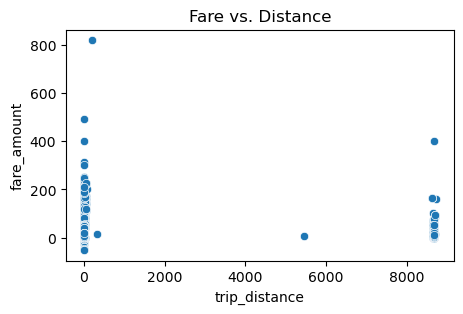

In [33]:
# Fare vs. Distance
plt.figure(figsize=(5,3))
sns.scatterplot(x='trip_distance', y='fare_amount', data=data)
plt.title('Fare vs. Distance')
plt.show()

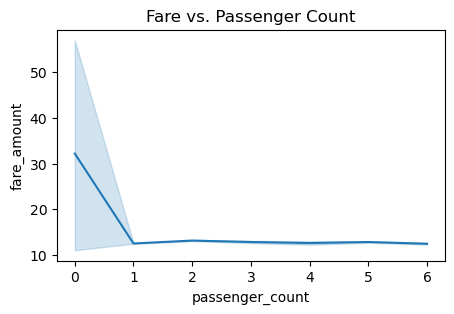

In [34]:
# Fare vs. Passenger Count
plt.figure(figsize=(5,3))
sns.lineplot(x='passenger_count', y='fare_amount', data=data)
plt.title('Fare vs. Passenger Count')
plt.show()

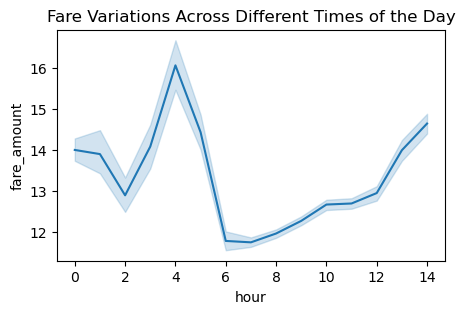

In [35]:
# Further EDA (example: fare variations across different times of the day)
plt.figure(figsize=(5,3))
sns.lineplot(x='hour', y='fare_amount', data=data)
plt.title('Fare Variations Across Different Times of the Day')
plt.show()

# **Outliers Treatment**

In [40]:
# Outlier Detection using IQR for 'fare_amount'
Q1 = data['fare_amount'].quantile(0.25)
Q3 = data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['fare_amount'] < (Q1 - 1.5 * IQR)) | (data['fare_amount'] > (Q3 + 1.5 * IQR))]
print("Outliers in Fare Amount:", outliers)

Outliers in Fare Amount:         VendorID      tpep_pickup_datetime     tpep_dropoff_datetime  \
2              2 2016-03-01 00:00:00+00:00 2016-03-01 00:31:06+00:00   
3              2 2016-03-01 00:00:00+00:00 2016-03-01 00:00:00+00:00   
4              2 2016-03-01 00:00:00+00:00 2016-03-01 00:00:00+00:00   
14             2 2016-03-01 00:00:02+00:00 2016-03-01 00:24:11+00:00   
18             2 2016-03-01 00:00:03+00:00 2016-03-01 00:32:45+00:00   
...          ...                       ...                       ...   
212256         2 2016-03-01 12:15:21+00:00 2016-03-01 12:43:04+00:00   
212258         2 2016-03-01 12:15:21+00:00 2016-03-01 12:59:29+00:00   
212260         2 2016-03-01 12:15:21+00:00 2016-03-01 12:49:29+00:00   
212323         2 2016-03-01 12:15:33+00:00 2016-03-01 12:44:42+00:00   
212324         2 2016-03-01 12:15:33+00:00 2016-03-01 13:05:23+00:00   

        passenger_count  pickup_longitude  pickup_latitude  RatecodeID  \
2                     2        -73.7

In [42]:
# Outlier Detection using Z-score for 'trip_distance'
mean = data['trip_distance'].mean()
std_dev = data['trip_distance'].std()
data['z_score'] = np.abs((data['trip_distance'] - mean) / std_dev)
outliers = data[data['z_score'] > 3]
print("Outliers in Trip Distance:", outliers)

Outliers in Trip Distance:         VendorID      tpep_pickup_datetime     tpep_dropoff_datetime  \
6              2 2016-03-01 00:00:00+00:00 2016-03-01 00:00:00+00:00   
434            2 2016-03-10 07:08:57+00:00 2016-03-10 07:09:03+00:00   
1337           2 2016-03-10 07:14:48+00:00 2016-03-10 07:14:58+00:00   
1457           2 2016-03-10 07:15:34+00:00 2016-03-10 07:15:36+00:00   
5196           2 2016-03-10 07:37:32+00:00 2016-03-10 07:37:40+00:00   
...          ...                       ...                       ...   
211574         1 2016-03-01 12:13:08+00:00 2016-03-01 12:21:40+00:00   
211663         1 2016-03-01 12:13:23+00:00 2016-03-01 12:13:23+00:00   
211810         1 2016-03-01 12:13:55+00:00 2016-03-01 12:13:55+00:00   
211927         1 2016-03-01 12:14:18+00:00 2016-03-01 12:30:49+00:00   
211954         1 2016-03-01 12:14:24+00:00 2016-03-01 12:26:26+00:00   

        passenger_count  pickup_longitude  pickup_latitude  RatecodeID  \
6                     6        -73

In [44]:
# Handling Outliers (example: removal)
df_filtered = data[~((data['fare_amount'] < (Q1 - 1.5 * IQR)) | (data['fare_amount'] > (Q3 + 1.5 * IQR)))]

In [46]:
df_filtered = df_filtered[~((df_filtered['trip_distance'] < (Q1 - 1.5 * IQR)) | (df_filtered['trip_distance'] > (Q3 + 1.5 * IQR)))]

In [48]:
df_filtered = df_filtered[~((df_filtered['RatecodeID'] < (Q1 - 1.5 * IQR)) | (df_filtered['RatecodeID'] > (Q3 + 1.5 * IQR)))]

In [50]:
df_filtered = df_filtered[~((df_filtered['improvement_surcharge'] < (Q1 - 1.5 * IQR)) | (df_filtered['improvement_surcharge'] > (Q3 + 1.5 * IQR)))]

In [52]:
df_filtered = df_filtered[~((df_filtered['tolls_amount'] < (Q1 - 1.5 * IQR)) | (df_filtered['tolls_amount'] > (Q3 + 1.5 * IQR)))]

In [54]:
df_filtered = df_filtered[~((df_filtered['mta_tax'] < (Q1 - 1.5 * IQR)) | (df_filtered['mta_tax'] > (Q3 + 1.5 * IQR)))]

In [56]:
df_filtered = df_filtered[~((df_filtered['tip_amount'] < (Q1 - 1.5 * IQR)) | (df_filtered['tip_amount'] > (Q3 + 1.5 * IQR)))]

In [58]:
df_filtered.drop('z_score',axis = 1, inplace= True)

In [60]:
numerical_cols = df_filtered.select_dtypes(exclude=['object','datetime64[ns, UTC]','datetime64[ns, US/Eastern]'])

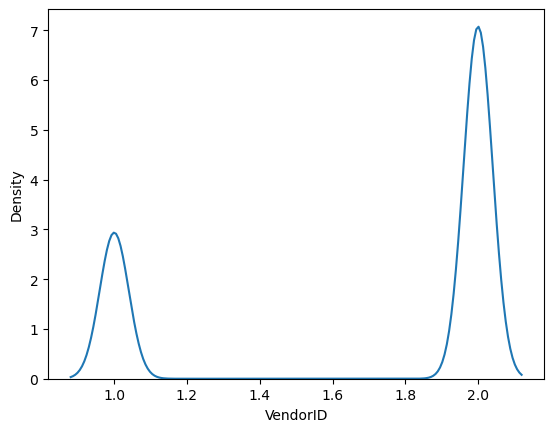

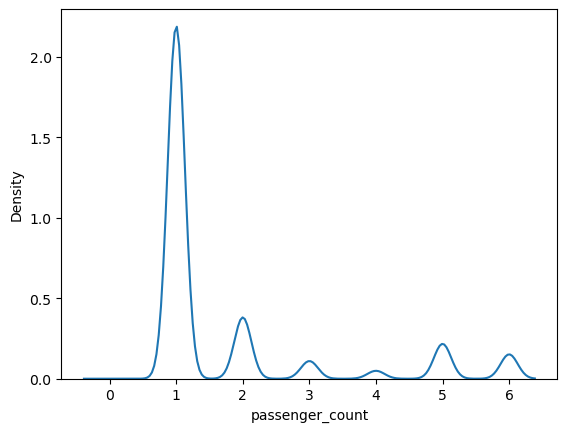

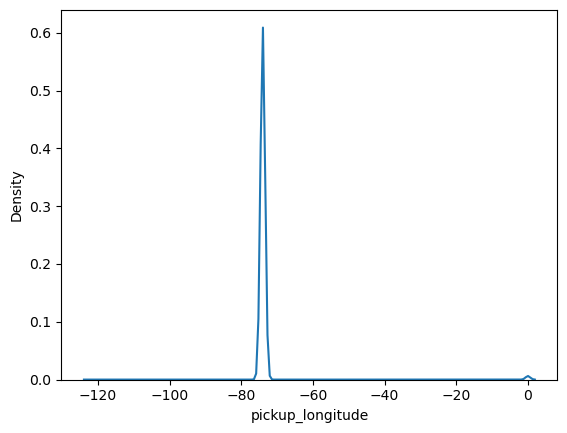

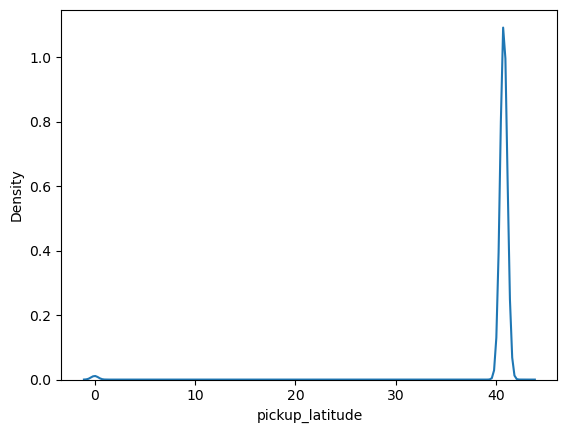

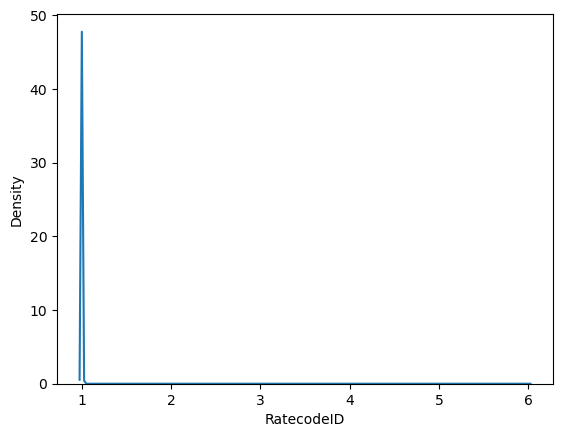

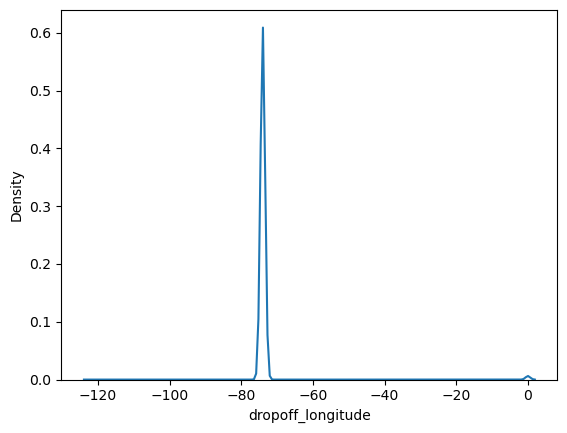

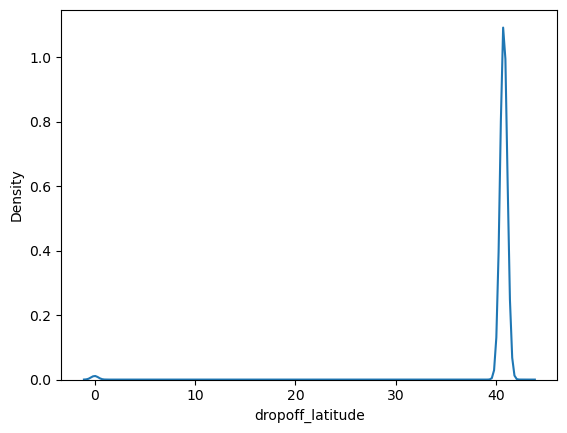

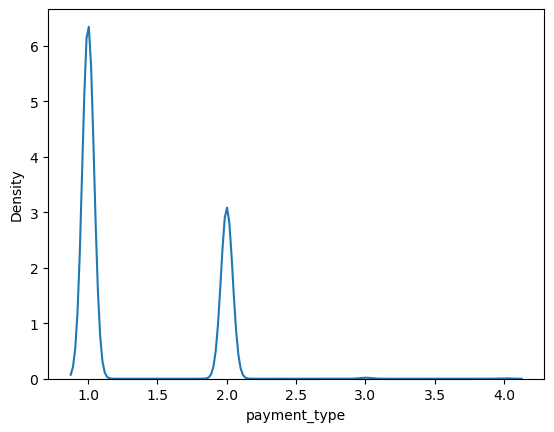

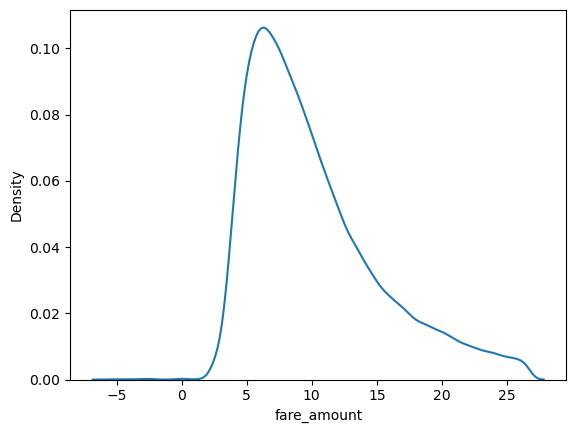

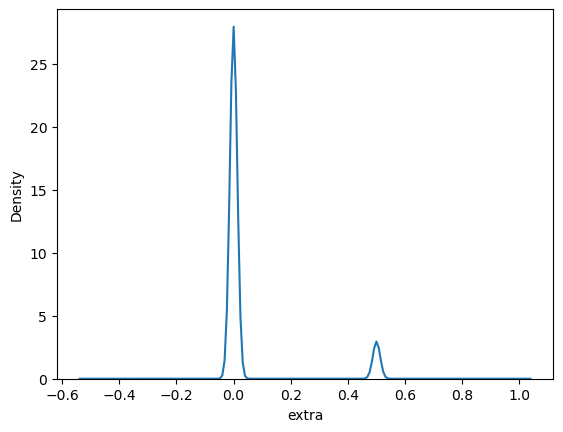

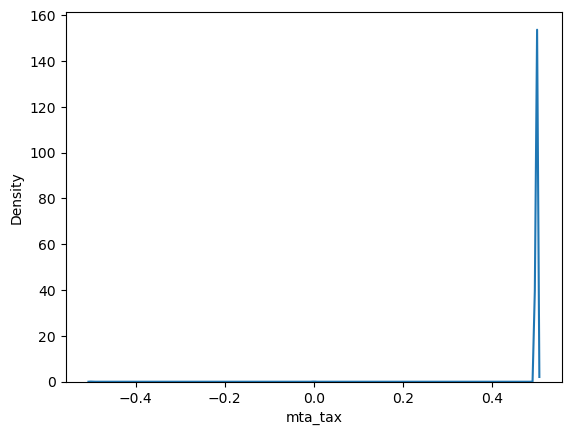

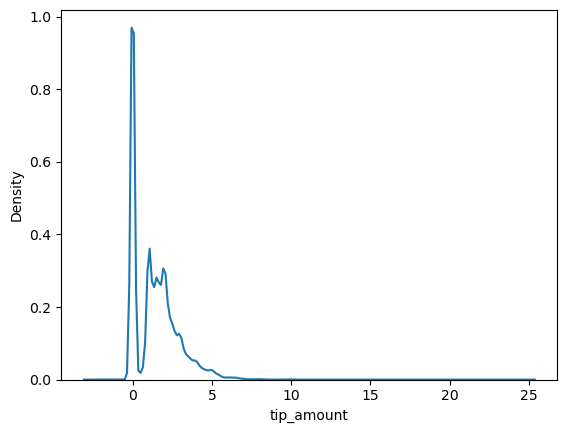

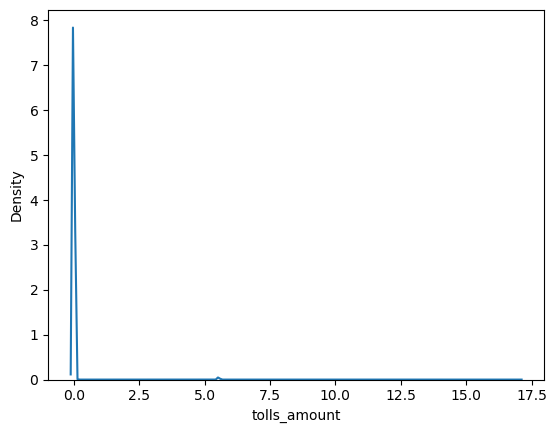

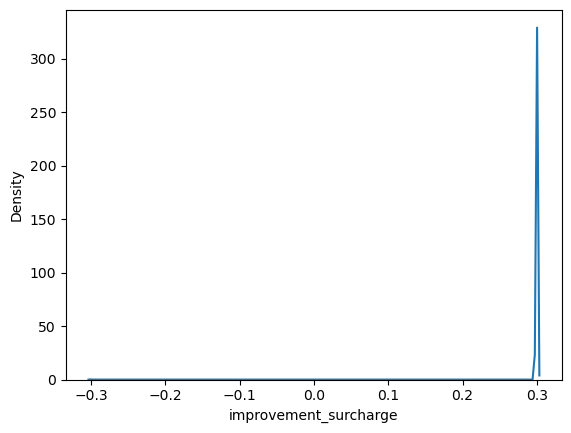

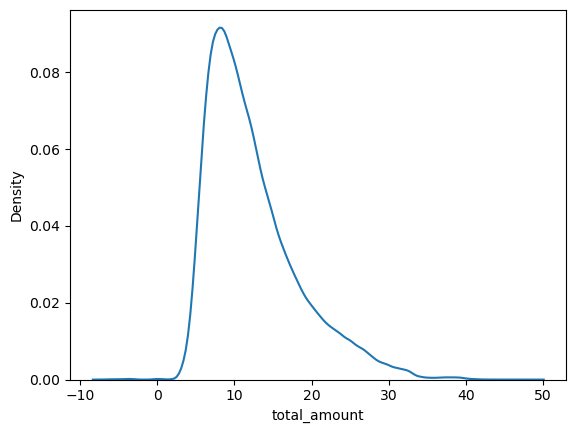

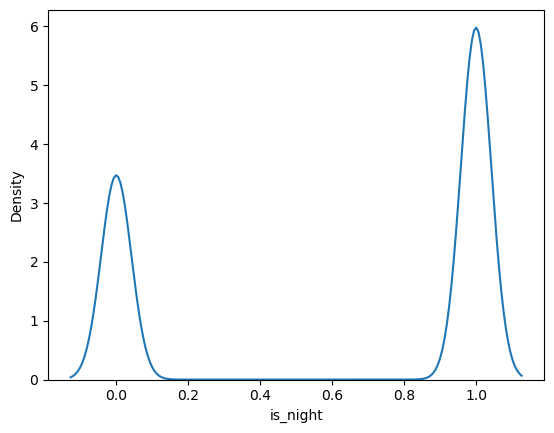

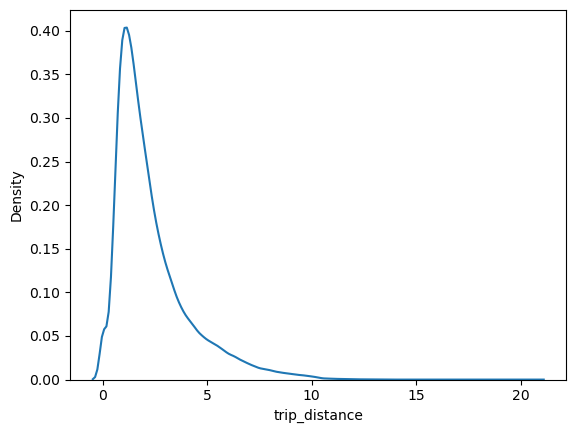

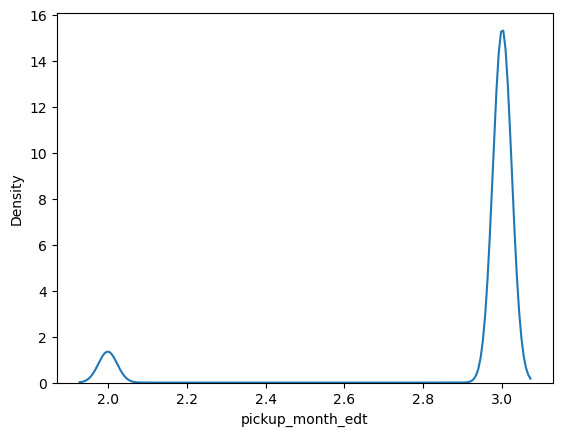

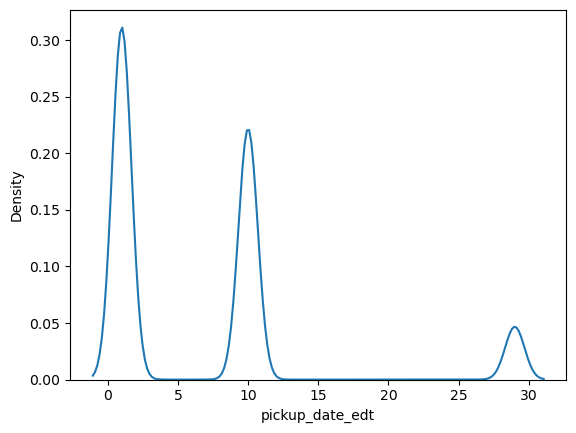

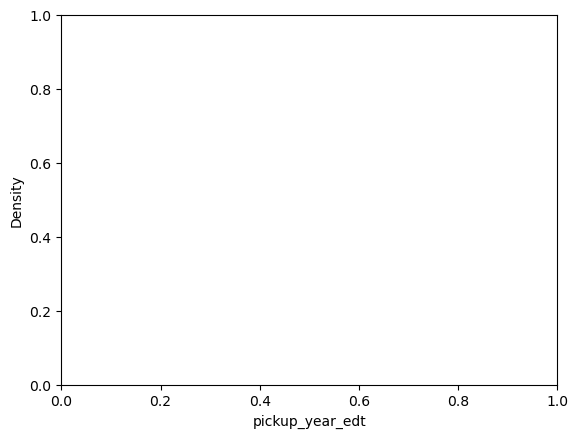

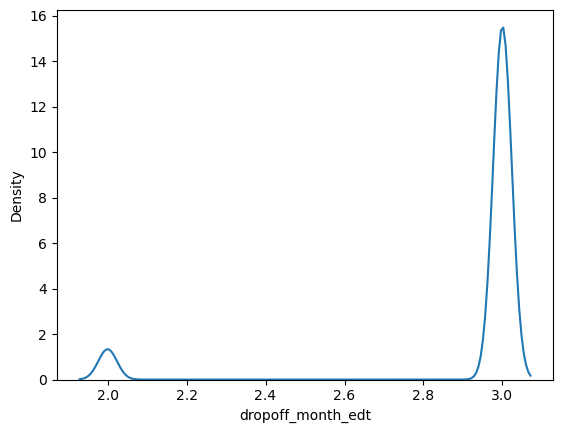

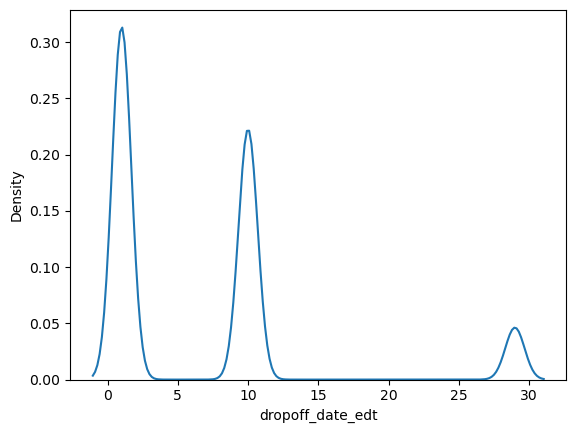

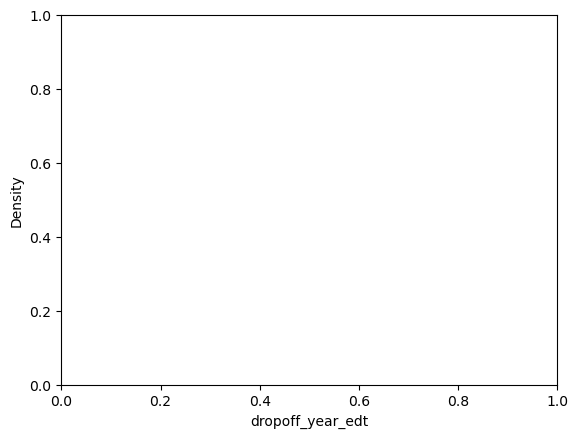

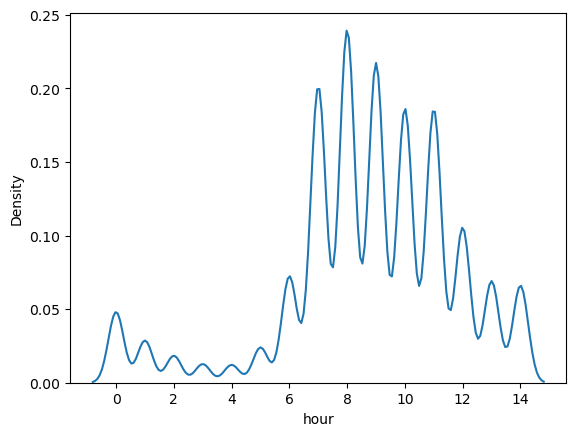

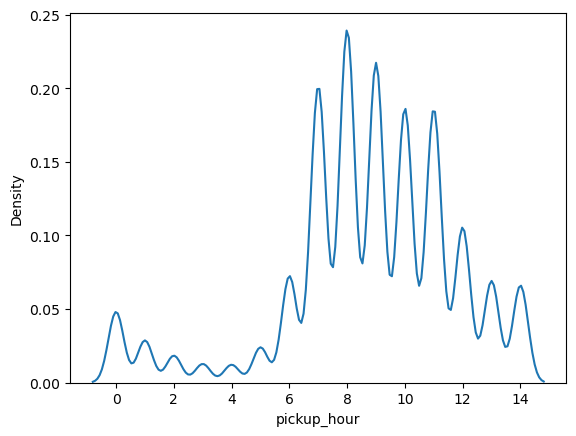

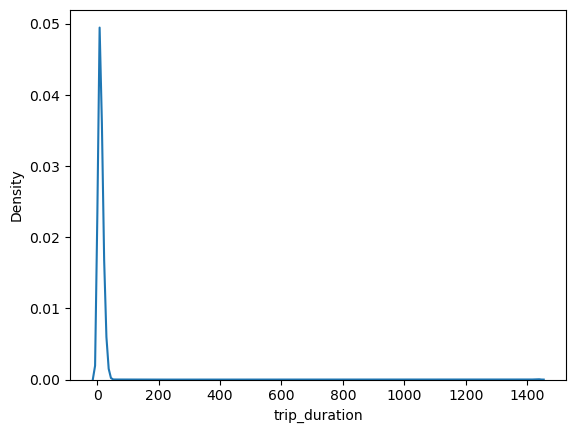

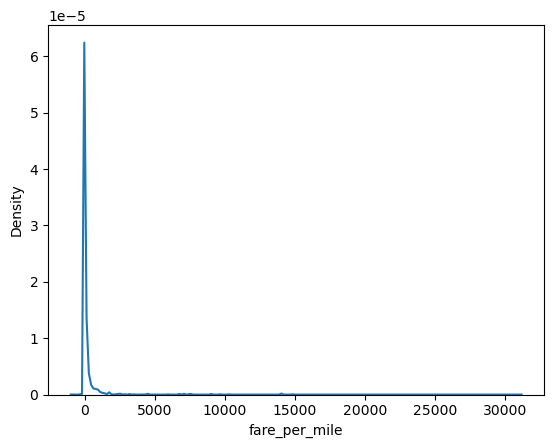

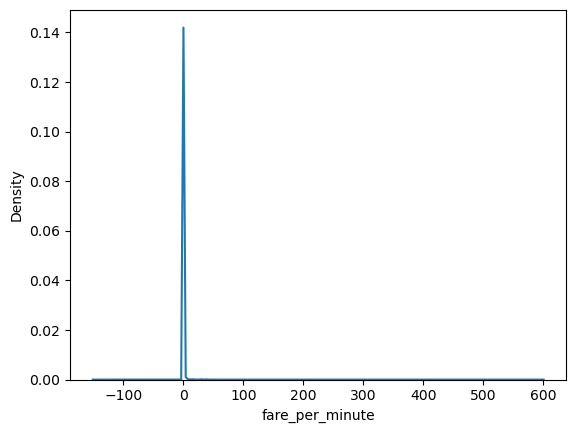

In [62]:
for i in df_filtered.select_dtypes(exclude=['object','datetime64[ns, UTC]','datetime64[ns, US/Eastern]']).columns:
    sns.kdeplot(df_filtered[i])
    plt.show()

In [63]:
# Check Skew ...
# Remove Infinity :
df_filtered = df_filtered.replace([np.inf, -np.inf], np.nan)
df_filtered['fare_per_minute'].fillna(df_filtered['fare_per_minute'].mean(), inplace = True)
df_filtered['fare_per_mile'].fillna(df_filtered['fare_per_mile'].mean(), inplace = True)

In [64]:
df_filtered.drop(df_filtered[['tpep_pickup_datetime','tpep_dropoff_datetime','tpep_pickup_datetime_edt','tpep_dropoff_datetime_edt']], axis = 1, inplace= True)

In [68]:
data.select_dtypes(exclude=['object','datetime64[ns, UTC]','datetime64[ns, US/Eastern]']).skew()

VendorID                  -0.916729
passenger_count            1.886940
pickup_longitude           9.095053
pickup_latitude           -9.106845
RatecodeID               147.767026
dropoff_longitude          9.268889
dropoff_latitude          -9.279274
payment_type               0.923366
fare_amount                6.077901
extra                      2.858197
mta_tax                  -17.753810
tip_amount                 7.663467
tolls_amount             164.715241
improvement_surcharge    -40.478078
total_amount               5.271134
is_night                  -0.523412
trip_distance             19.776430
pickup_month_edt          -3.023795
pickup_date_edt            1.647767
pickup_year_edt            0.000000
dropoff_month_edt         -3.068803
dropoff_date_edt           1.659031
dropoff_year_edt           0.000000
hour                      -0.854965
pickup_hour               -0.854965
trip_duration             11.860000
fare_per_mile                   NaN
fare_per_minute             

In [70]:
df_filtered.select_dtypes(exclude=['object','datetime64[ns, UTC]','datetime64[ns, US/Eastern]']).skew()

VendorID                  -0.908269
passenger_count            1.889256
pickup_longitude           9.809953
pickup_latitude           -9.823417
RatecodeID                40.173215
dropoff_longitude          9.809939
dropoff_latitude          -9.823351
payment_type               0.879957
fare_amount                1.063205
extra                      2.758195
mta_tax                  -35.190577
tip_amount                 1.419761
tolls_amount              13.562219
improvement_surcharge    -43.965582
total_amount               1.211966
is_night                  -0.550496
trip_distance              1.697869
pickup_month_edt          -3.082233
pickup_date_edt            1.668330
pickup_year_edt            0.000000
dropoff_month_edt         -3.114329
dropoff_date_edt           1.675995
dropoff_year_edt           0.000000
hour                      -0.863507
pickup_hour               -0.863507
trip_duration             25.972200
fare_per_mile            101.281937
fare_per_minute           72

In [72]:
df_filtered = df_filtered[~((df_filtered['trip_duration'] < (Q1 - 1.5 * IQR)) | (df_filtered['trip_duration'] > (Q3 + 1.5 * IQR)))]
df_filtered = df_filtered[~((df_filtered['fare_per_mile'] < (Q1 - 1.5 * IQR)) | (df_filtered['fare_per_mile'] > (Q3 + 1.5 * IQR)))]
df_filtered = df_filtered[~((df_filtered['fare_per_minute'] < (Q1 - 1.5 * IQR)) | (df_filtered['fare_per_minute'] > (Q3 + 1.5 * IQR)))]

In [74]:
df_filtered.select_dtypes(exclude=['object','datetime64[ns, UTC]','datetime64[ns, US/Eastern]']).skew()

VendorID                 -0.893123
passenger_count           1.896505
pickup_longitude          9.976083
pickup_latitude          -9.975668
RatecodeID               67.765653
dropoff_longitude         9.976067
dropoff_latitude         -9.975595
payment_type              0.839147
fare_amount               1.096791
extra                     2.689839
mta_tax                 -59.331498
tip_amount                1.341604
tolls_amount             13.855041
improvement_surcharge   -79.432444
total_amount              1.306796
is_night                 -0.564439
trip_distance             1.877002
pickup_month_edt         -3.008685
pickup_date_edt           1.659902
pickup_year_edt           0.000000
dropoff_month_edt        -3.037723
dropoff_date_edt          1.667762
dropoff_year_edt          0.000000
hour                     -0.854563
pickup_hour              -0.854563
trip_duration             0.556580
fare_per_mile             2.338189
fare_per_minute          22.124184
dtype: float64

In [76]:
plot = df_filtered.select_dtypes(exclude=['object','datetime64[ns, UTC]','datetime64[ns, US/Eastern]']).skew().sort_values(ascending=False).head(10)

In [78]:
plot.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, RatecodeID to dropoff_date_edt
Series name: None
Non-Null Count  Dtype  
--------------  -----  
10 non-null     float64
dtypes: float64(1)
memory usage: 160.0+ bytes


In [80]:
plot_df = plot.to_frame()

In [82]:
plot_df = plot_df.T.columns

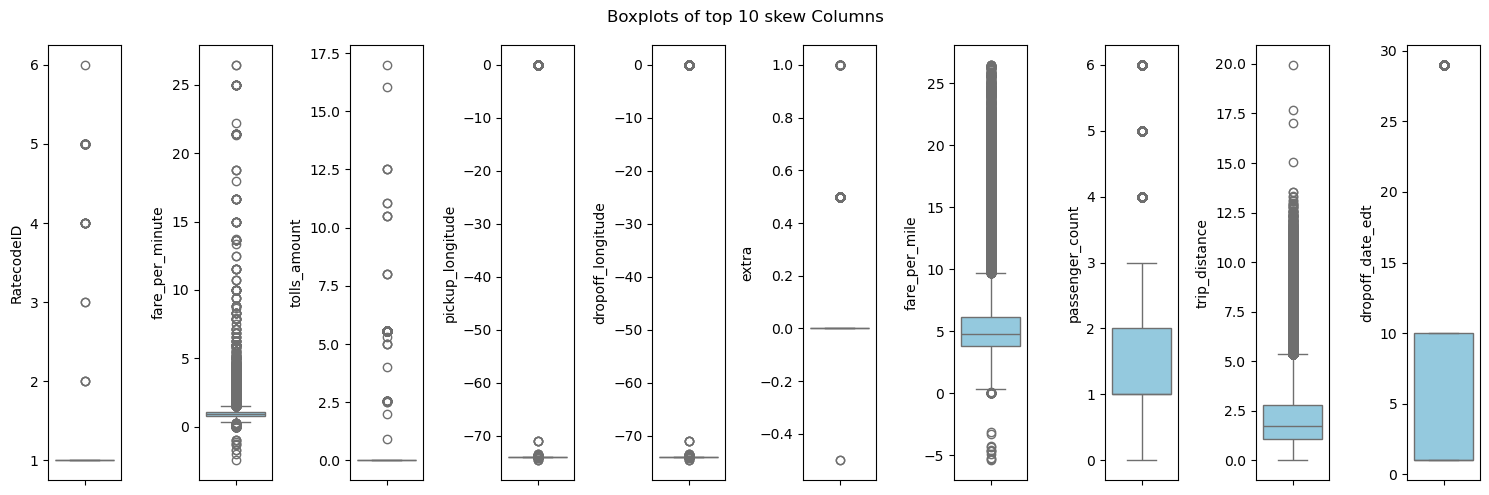

In [83]:
plt.figure(figsize=(15, 5))
plt.suptitle('Boxplots of top 10 skew Columns')
for i in range(0, len(plot_df)):
    plt.subplot(1, 10, i+1)
    sns.boxplot(y=df_filtered[plot_df[i]],color='skyblue',)
    plt.tight_layout()

# **Analyze The Patterns**

In [87]:
df_filtered.columns

Index(['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'pickup_day', 'am_pm', 'is_night', 'trip_distance', 'pickup_month_edt',
       'pickup_date_edt', 'pickup_year_edt', 'dropoff_month_edt',
       'dropoff_date_edt', 'dropoff_year_edt', 'hour', 'pickup_hour',
       'trip_duration', 'fare_per_mile', 'fare_per_minute'],
      dtype='object')

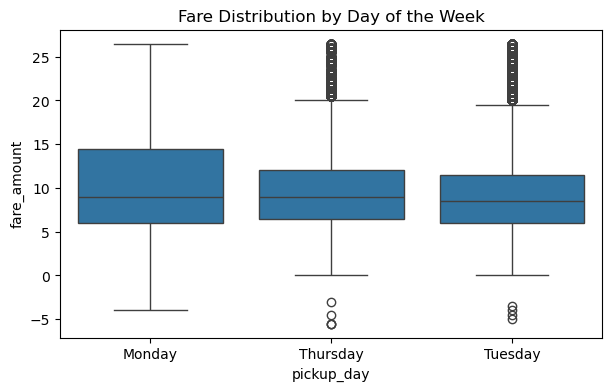

In [89]:
# Task 1: Analyzing fare variations
plt.figure(figsize=(7,4))
sns.boxplot(x=df_filtered['pickup_day'], y=df_filtered['fare_amount'], data=df_filtered)
plt.title('Fare Distribution by Day of the Week')
plt.show()

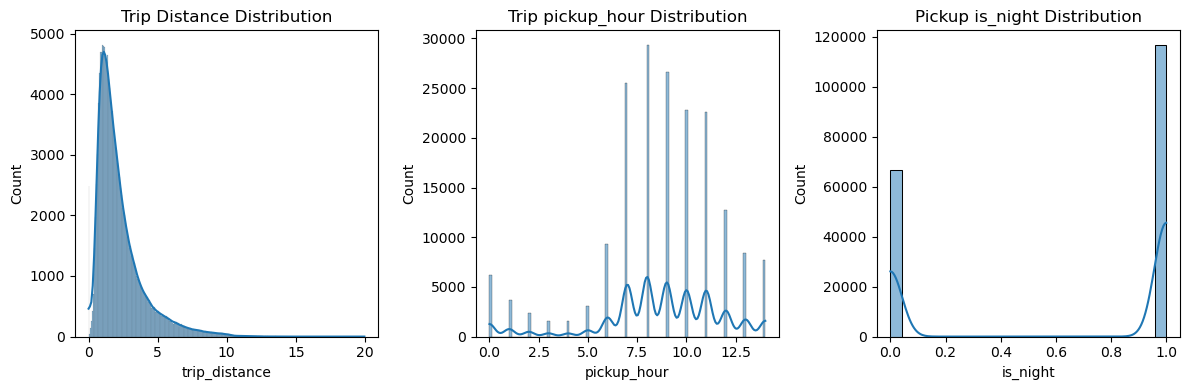

In [90]:
# Task 2: Studying distribution of trip distances, trip durations, and pickup hours
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_filtered['trip_distance'], kde=True)
plt.title('Trip Distance Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df_filtered['pickup_hour'], kde=True)
plt.title('Trip pickup_hour Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df_filtered['is_night'], kde=True, bins=24)
plt.title('Pickup is_night Distribution')
plt.tight_layout()
plt.show()

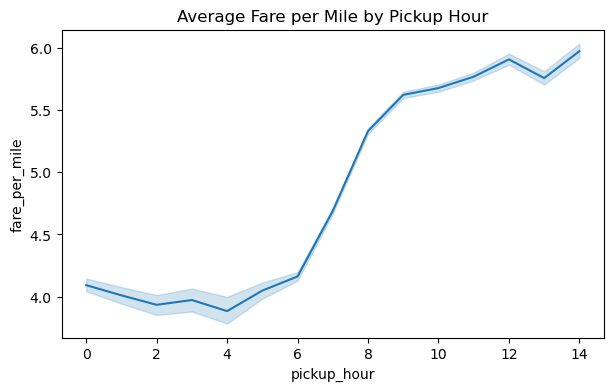

In [91]:
# Task 3: Exploring fare per mile and fare per minute
plt.figure(figsize=(7, 4))
sns.lineplot(x=df_filtered['pickup_hour'], y=df_filtered['fare_per_mile'], data=df_filtered.groupby('pickup_hour')['fare_per_mile'].mean().reset_index())
plt.title('Average Fare per Mile by Pickup Hour')
plt.show()

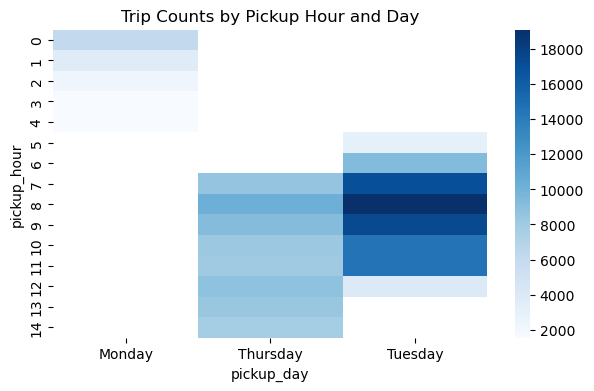

In [93]:
# Task 4: Visualizing trip counts by pickup hour and pickup day
trip_counts = df_filtered.groupby(['pickup_hour', 'pickup_day']).size().unstack()
plt.figure(figsize=(7,4))
sns.heatmap(trip_counts, cmap='Blues')
plt.title('Trip Counts by Pickup Hour and Day')
plt.show()

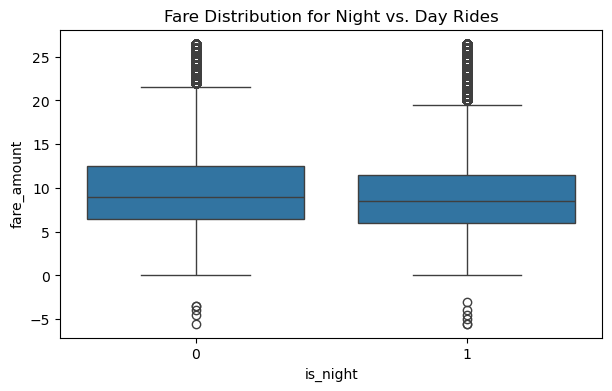

In [94]:
# Task 5: Investigating impact of night rides and weekend trips on fare amounts
plt.figure(figsize=(7,4))
sns.boxplot(x=df_filtered['is_night'], y=df_filtered['fare_amount'], data=df_filtered)
plt.title('Fare Distribution for Night vs. Day Rides')
plt.show()

# **Data Transformation**

In [96]:
df_filtered.head(3)

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,...,pickup_date_edt,pickup_year_edt,dropoff_month_edt,dropoff_date_edt,dropoff_year_edt,hour,pickup_hour,trip_duration,fare_per_mile,fare_per_minute
0,1,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,...,29,2016,2,29,2016,0,0,7.916667,2.867981,1.136842
1,1,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,...,29,2016,2,29,2016,0,0,11.100000,2.556159,0.990991
5,2,5,-74.017197,40.705383,1,N,-73.978073,40.755787,1,23.5,...,29,2016,2,29,2016,0,0,0.000000,3.614121,1.047696


In [97]:
df_filtered1 = df_filtered.copy()

In [98]:
df_filtered = df_filtered1.copy()

In [99]:
df_filtered1.head(2)

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,...,pickup_date_edt,pickup_year_edt,dropoff_month_edt,dropoff_date_edt,dropoff_year_edt,hour,pickup_hour,trip_duration,fare_per_mile,fare_per_minute
0,1,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,...,29,2016,2,29,2016,0,0,7.916667,2.867981,1.136842
1,1,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,...,29,2016,2,29,2016,0,0,11.100000,2.556159,0.990991


In [108]:
df_filtered.select_dtypes(include='object')

,store_and_fwd_flag,pickup_day,am_pm
0,N,Monday,pm
1,N,Monday,pm
5,N,Monday,pm
7,N,Monday,pm
8,N,Monday,pm
...,...,...,...
212340,N,Tuesday,am
212341,N,Tuesday,am
212342,N,Tuesday,am
212343,N,Tuesday,am


In [110]:
label_encoder = LabelEncoder()


df_filtered['store_and_fwd_flag'] = label_encoder.fit_transform(df_filtered['store_and_fwd_flag'])
df_filtered['pickup_day'] = label_encoder.fit_transform(df_filtered['pickup_day'])
df_filtered['am_pm'] = label_encoder.fit_transform(df_filtered['am_pm'])

In [112]:
corr = df_filtered.select_dtypes(exclude=['datetime64[ns, US/Eastern]','datetime64[ns, UTC]'] ).corr()

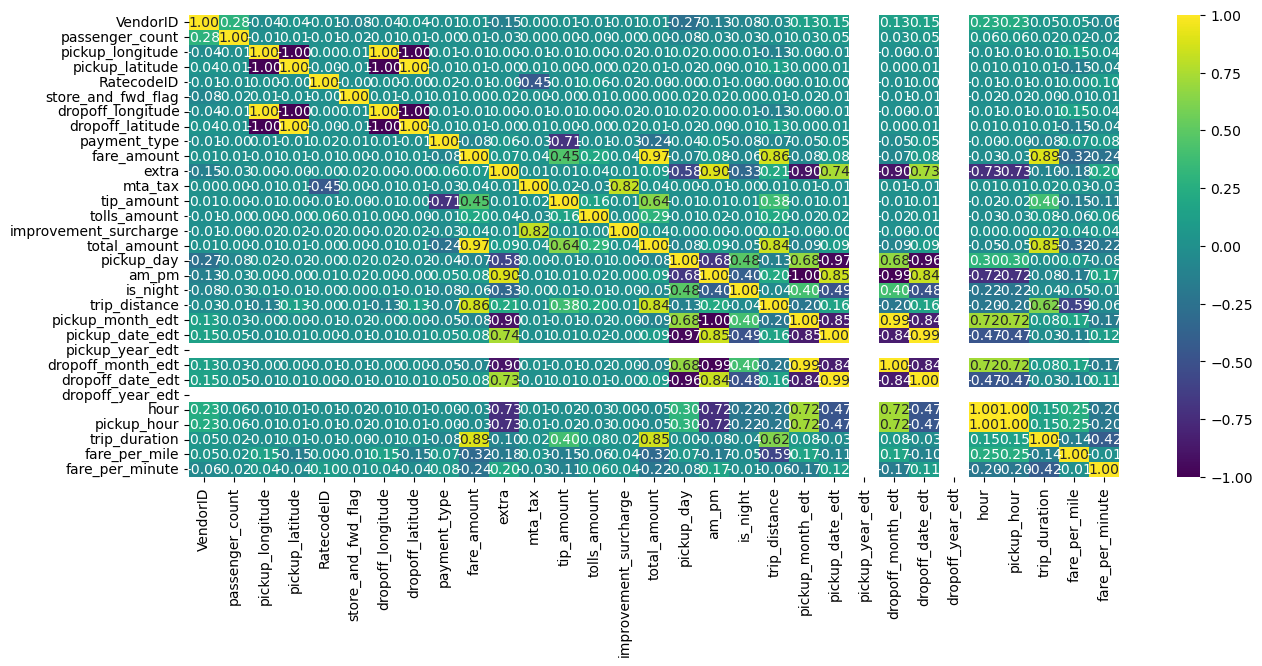

In [113]:
plt.figure(figsize=(15,6))
sns.heatmap(data = corr,annot=True, fmt='.2f',cmap =  'viridis')
plt.show()

In [116]:
df_filtered.head(3).T

,0,1,5
VendorID,1.000000,1.000000,2.000000
passenger_count,1.000000,1.000000,5.000000
pickup_longitude,-73.976746,-73.983482,-74.017197
pickup_latitude,40.765152,40.767925,40.705383
RatecodeID,1.000000,1.000000,1.000000
store_and_fwd_flag,0.000000,0.000000,0.000000
dropoff_longitude,-74.004265,-74.005943,-73.978073
dropoff_latitude,40.746128,40.733166,40.755787
payment_type,1.000000,1.000000,1.000000
fare_amount,9.000000,11.000000,23.500000


In [118]:
df_filtered2 =df_filtered.copy()

# **Feature Selection**

In [125]:
# Filtered Method :

In [127]:
val = df_filtered.drop(['total_amount'],axis = 1)

tar = df_filtered['total_amount']

In [129]:
# Embeded Feature Selection :

fs = RandomForestRegressor(n_estimators= 150 , random_state= 66)

fs.fit(val,tar)

RandomForestRegressor(n_estimators=150, random_state=66)

In [133]:
pd.DataFrame({
    'Columns' : val.columns,
    'RF Score' : fs.feature_importances_
}).sort_values("RF Score", ascending= False)#.head(7)

,Columns,RF Score
9,fare_amount,0.914448
12,tip_amount,0.074994
13,tolls_amount,0.009538
10,extra,0.000503
14,improvement_surcharge,0.000186
25,hour,0.000047
29,fare_per_minute,0.000045
26,pickup_hour,0.000044
6,dropoff_longitude,0.000023
28,fare_per_mile,0.000023


In [135]:
df_filtered['mta_tax'].unique()

array([ 0.5,  0. , -0.5])

In [137]:
df_filtered['extra'].unique()

array([ 0.5,  1. ,  0. , -0.5])

In [139]:
df_filtered['tolls_amount'].mean()

0.031607786354283476

In [141]:
df_filtered['improvement_surcharge'].unique()

array([ 0.3,  0. , -0.3])

In [143]:
df_filtered['tip_amount'].mean()

1.33746181398539

In [145]:
df_filtered.head()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,...,pickup_date_edt,pickup_year_edt,dropoff_month_edt,dropoff_date_edt,dropoff_year_edt,hour,pickup_hour,trip_duration,fare_per_mile,fare_per_minute
0,1,1,-73.976746,40.765152,1,0,-74.004265,40.746128,1,9.0,...,29,2016,2,29,2016,0,0,7.916667,2.867981,1.136842
1,1,1,-73.983482,40.767925,1,0,-74.005943,40.733166,1,11.0,...,29,2016,2,29,2016,0,0,11.100000,2.556159,0.990991
5,2,5,-74.017197,40.705383,1,0,-73.978073,40.755787,1,23.5,...,29,2016,2,29,2016,0,0,0.000000,3.614121,1.047696
7,1,1,-73.788773,40.647758,1,0,-73.829208,40.712345,3,20.5,...,29,2016,2,29,2016,0,0,16.050000,2.578595,1.277259
8,1,1,-73.958221,40.764641,1,0,-73.967896,40.762901,1,5.5,...,29,2016,2,29,2016,0,0,4.983333,6.567990,1.103679


In [147]:
df_filtered.drop(['dropoff_year_edt','pickup_year_edt','RatecodeID','VendorID','is_night',
                  'dropoff_month_edt','store_and_fwd_flag','dropoff_date_edt',
                  'pickup_month_edt','pickup_day','pickup_date_edt','hour','mta_tax','extra',
                 'tolls_amount','improvement_surcharge','trip_distance','trip_duration','fare_per_minute','fare_per_mile'],axis =1,inplace= True)

In [149]:
df_filtered.shape

(183706, 11)

In [151]:
x = df_filtered.drop(['total_amount'],axis = 1)

y = df_filtered['total_amount']

In [153]:
df_filtered.head(40).T

,0,1,5,7,8,9,10,11,12,13,...,41,42,43,44,45,46,47,48,49,50
passenger_count,1.000000,1.000000,5.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
pickup_longitude,-73.976746,-73.983482,-74.017197,-73.788773,-73.958221,-73.985779,-73.988426,-73.969818,-73.953804,-73.976089,...,-73.954185,-73.961700,-73.989021,-73.971130,-73.981972,-73.969040,-73.998428,-74.005783,-73.987137,-73.978790
pickup_latitude,40.765152,40.767925,40.705383,40.647758,40.764641,40.741192,40.764160,40.797428,40.788128,40.752171,...,40.764141,40.654949,40.718906,40.751526,40.761696,40.790981,40.740582,40.740410,40.720516,40.762466
dropoff_longitude,-74.004265,-74.005943,-73.978073,-73.829208,-73.967896,-73.946350,-73.992393,-73.943771,-73.971550,-73.987450,...,-73.902435,-73.936127,-73.946709,-73.988739,-73.974922,-73.962090,-73.994591,-73.981972,-73.969498,-73.989105
dropoff_latitude,40.746128,40.733166,40.755787,40.712345,40.762901,40.797878,40.758224,40.796200,40.795238,40.770782,...,40.826969,40.697720,40.695648,40.712822,40.793175,40.805351,40.754990,40.764008,40.761105,40.730717
payment_type,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
fare_amount,9.000000,11.000000,23.500000,20.500000,5.500000,23.500000,4.000000,8.000000,5.500000,9.000000,...,22.500000,15.500000,12.000000,13.000000,11.000000,5.500000,6.000000,11.000000,20.500000,11.500000
tip_amount,2.050000,3.050000,5.060000,0.000000,2.000000,3.200000,0.000000,0.000000,2.200000,2.060000,...,0.000000,2.000000,0.000000,2.850000,0.000000,1.000000,1.460000,2.450000,4.360000,3.200000
total_amount,12.350000,15.350000,30.360000,21.800000,8.800000,28.000000,5.300000,9.300000,9.000000,12.360000,...,23.800000,18.800000,13.300000,17.150000,12.300000,7.800000,8.760000,14.750000,26.160000,16.000000
am_pm,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Model Building**

In [156]:
# Training and Testing Data : 

In [158]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=67)

In [160]:
# Build the model : 

In [162]:
models = {
    "Linear Regression": LinearRegression(),
    "lasso" : Lasso(alpha = 0.1),
    "ridge" : Ridge( alpha = 0.9 , max_iter = 150),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "XGBoost Regressor": XGBRegressor()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on test data

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,0.116093,0.166806,0.408419,0.994060
lasso,0.129813,0.187056,0.432499,0.993339
ridge,0.115524,0.166915,0.408553,0.994056
Decision Tree Regressor,0.029539,0.135349,0.367898,0.995181
XGBoost Regressor,0.053804,0.079992,0.282829,0.997152


In [164]:
from sklearn.model_selection import cross_val_score, KFold

# Define the model
xgb = XGBRegressor(n_estimators=100, random_state=97)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=97)

# Perform Cross-Validation
cv_scores = cross_val_score(xgb, x, y, cv=kf, scoring='r2')

# Print all 5 scores
print(f"All 10-Fold Scores: {cv_scores}")
print()
# Compare Mean and Standard Deviation
print(f"Mean R2 Score: {np.mean(cv_scores):.1f}")
print(f"Mean std Score: {np.std(cv_scores):.1f}")


All 10-Fold Scores: [0.99684627 0.99711088 0.99666811 0.99726395 0.99739303 0.99779991
 0.99723131 0.99607466 0.99751054 0.99639092]

Mean R2 Score: 1.0
Mean std Score: 0.0


In [166]:
print(f"{np.mean(cv_scores):.1f}")

1.0


In [168]:
xgb.fit(x_train, y_train)
print("Test R2 Score : ", xgb.score(x_test, y_test) )

Test R2 Score :  0.9971516334175574


### Final Results

In [170]:
res = {
    'metric' : [ 
    "Training R2 : ",
    "Cross-Validation R2 (mean) : ",
    "Cross-Validation Std : ",
    "Test R2 : "] ,
    'value' : [
        '0.9971',
        '1.0000',
        '0.0000',
        '0.9971'
    ]
}

df1 = pd.DataFrame(res)
print("\n             **Final Results** ")
print("____________________________________ \n")
df1


             **Final Results** 
____________________________________ 



,metric,value
0,Training R2 :,0.9971
1,Cross-Validation R2 (mean) :,1.0000
2,Cross-Validation Std :,0.0000
3,Test R2 :,0.9971


In [172]:
df_filtered.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'tip_amount', 'total_amount', 'am_pm', 'pickup_hour'],
      dtype='object')

In [190]:
df_filtered['pickup_longitude'].min()

-74.65130615234375

In [192]:
df_filtered['pickup_longitude'].max()

0.0

In [184]:
df_filtered['pickup_latitude'].min()

0.0

In [186]:
df_filtered['pickup_latitude'].max()

42.786933898925774

In [194]:
df_filtered['dropoff_longitude'].min()

-74.65130615234375

In [196]:
df_filtered['dropoff_longitude'].max()

0.0

In [198]:
df_filtered['dropoff_latitude'].min()

0.0

In [200]:
df_filtered['dropoff_latitude'].max()

42.786933898925774

In [202]:
df_filtered['fare_amount'].max()

26.5

In [206]:
df_filtered['fare_amount'].min()

-5.5

In [174]:
import pickle

with open("model.pkl",'wb') as file:
    pickle.dump(xgb,file )

In [71]:
%%writefile Project3.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np
import time
import base64


# Function to load and encode local jpg image
def get_base64_of_bin_file(bin_file):
    with open(bin_file, 'rb') as f:
        data = f.read()
    return base64.b64encode(data).decode()

# Local image filename (same folder)
image_file = 'ass.gif'

# Get base64 string
img_base64 = get_base64_of_bin_file(image_file)

# Inject HTML + CSS for background
page_bg_img = f"""
<style>
.stApp {{
  background-image: url("data:image/jpg;base64,{img_base64}");
  background-size: cover;
  background-repeat: no-repeat;
  background-attachment: fixed;
}}
</style>
"""

# Load CSS
st.markdown(page_bg_img, unsafe_allow_html=True)

model = pickle.load(open("model.pkl", "rb"))

# Define pages
def page1():
    st.markdown(""" \n \n""")
    if st.button("Go to Prediction Page"):
        return "page2"
    return "page1"

def page2():
    st.markdown(""" \n \n""")
    
    col1, col2 = st.columns(2)
    with col1:
        if st.button("Back"):
            return "page1"
    with col2:
        if st.button("Go to Creator Info"):
            return "page3"
    return "page2"

def page3():
    st.markdown(""" \n \n""")

    col1, col2 = st.columns(2)
    with col1:
        if st.button("Back"):
            return "page2"
    return "page3"

# Initialize page
if "current_page" not in st.session_state:
    st.session_state.current_page = "page1"

# Render pages
if st.session_state.current_page == "page1":
    
    st.title(' :car: TripFare : Predicting Urban Taxi Fare with Machine Learning')
  
    st.markdown(""" ##### As a Data Analyst at an urban mobility analytics firm, my mission is to unlock insights from real-world taxi trip data to enhance fare estimation 
    ##### systems and promote pricing transparency for passengers. This project focuses on analyzing historical taxi trip records collected from a
    ##### metropolitan transportation network. """)

    st.markdown(""" \n \n""")
    st.markdown(""" <style>.image-right { float : left; } </style> """, unsafe_allow_html = True, )
    st.markdown('<div class = "image-left">', unsafe_allow_html = True)
    st.image("c.jpg", width=265)
    st.markdown('</div>', unsafe_allow_html = True)
    st.markdown(""" \n \n""")
    
    st.markdown(""" \n 
    #### Skills Take Away From This Project \n
● Exploratory Data Analysis (EDA)\n  
● Data cleaning and preprocessing \n
● Data Visualization with Matplotlib & Seaborn \n
● Feature Engineering  \n
● Regression Model Building \n
● Model Evaluation & Comparison \n
● Hyperparameter Tuning \n
● Streamlit  \n""")

    next_page = page1()
    
    if next_page == "page2":
        st.session_state.current_page = "page2"
        
elif st.session_state.current_page == "page2":
    

    st.title(" Taxi Fare Prediction ")
    st.subheader("Please Provide Your Travel Details 👇 :")
    
    c1,c2,c3, c4, c5 = st.columns([1,1,1,1,1], gap = 'large')
    c6,c7,c8,c9,c10 = st.columns([1,1,1,1,1], gap = 'large')
    
    # ✅ User Input
    with c1 :
        pickup_longitude = st.slider("Pickup Longitude (-74.65 to 0) ", min_value=-74.65, max_value=0.00, step=0.01)
    with c2 :
        pickup_latitude = st.slider("Pickup Latitude (0 to 43) ", min_value=0.00, max_value=43.00, step=0.01)
    with c3 :
        dropoff_longitude = st.slider("Dropoff Longitude (-74.65 to 0) ", min_value=-74.65, max_value=0.00, step=0.01)
    with c4 :
        dropoff_latitude = st.slider("Dropoff Latitude (0 to 43) ", min_value=0.00, max_value=43.00, step=0.01)
    with c5 :
        fare_amount = st.slider("fare amount (max fare = 28) ", min_value=1.0, max_value=28.0, step=0.5)
    with c6 :
        passenger_count = st.number_input("Passenger Count ( max count = 6 )", min_value=1, max_value=6, step=1)
    with c7 :
        pickup_hour = st.slider("Pickup Time - Hour", 0, 23)
    with c8 :
        am_pm = st.selectbox("AM or PM?", options=['AM', 'PM'])
    with c9 :
        payment_type = st.selectbox("Pay Options", options=['Cash', 'Card', 'UPI', 'Wallet'])    
    with c10 :
        tip_amount = st.number_input("Tip fare", step=1)
        
        
    # ✅ map categorical input to number
    payment_map = {'Cash': 1, 'Card': 2,'UPI': 3,'Wallet': 4}
    am_pm_map = {'AM': 0, 'PM': 1}
    
    # ✅ Isert Datas
    input_data = np.array([[passenger_count, pickup_longitude, pickup_latitude,
                            dropoff_longitude, dropoff_latitude,
                            payment_map[payment_type],fare_amount, tip_amount,
                            am_pm_map[am_pm], pickup_hour]])
    
    # ✅ prediction
    if st.button("Predict the amount "):
        with st.spinner("Happy Journey Loading 😎 .."):
            time.sleep(2)
            st.markdown("##### Have a nice journey 😁 ...!")
            col1, col2 = st.columns([1,1],gap = "small") 
            
            col1.image("s.png",width = 120)
            prediction = model.predict(input_data)[0]
            total = prediction + 0.5 + 1 + 0.3 + 0.3
            col2.markdown(f"<h3>Your  Total Fare  Amount  🚕 : {total:.2f}</h3>", unsafe_allow_html = True)
            col2.markdown(" ###### (include : mta_tax,   extra_charges,   tolls_amount,   improvement_surcharge) " )
    
    next_page = page2()
    
    if next_page == "page1":
        st.session_state.current_page = "page1"
    elif next_page == "page3":
        st.session_state.current_page = "page3"

elif st.session_state.current_page == "page3":
    
    st.title("💻 Creator of this Project")
    st.markdown(""" \n \n""")
    st.write("""
#    **Developed by:** Sudharsan M S 👨‍💻 \n
##    **Skills:**      Python 🐍, Machine Learning 📈, Streamlit ⌛
    """)

    st.image('images.png', width=190)

    next_page = page3()
    if next_page == "page2":
        st.session_state.current_page = "page2"
        
    

Overwriting Project3.py
